In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("C:/Users/maths/Desktop/FML-AVI-230957164/cancer.csv")
df

,State,Total.Rate,Total.Number,Total.Population,Rates.Age.< 18,Rates.Age.18-45,Rates.Age.45-64,Rates.Age.> 64,Rates.Age and Sex.Female.< 18,Rates.Age and Sex.Male.< 18,...,Types.Lung.Age and Sex.Male.45 - 64,Types.Lung.Age and Sex.Female.> 64,Types.Lung.Age and Sex.Male.> 64,Types.Lung.Race.White,Types.Lung.Race.White non-Hispanic,Types.Lung.Race.Black,Types.Lung.Race.Black non-Hispanic,Types.Lung.Race.Asian,Types.Lung.Race.Indigenous,Types.Lung.Race.Hispanic
0,Alabama,214.2,71529.0,33387205.0,2.0,18.5,244.7,1017.8,2.0,2.1,...,102.9,221.7,457.4,59.9,60.4,52.6,52.8,23.0,22.9,14.8
1,Alaska,128.1,6361.0,4966180.0,1.7,11.8,170.9,965.2,0.0,0.0,...,50.3,268.3,335.0,48.7,49.5,45.6,47.9,33.0,74.4,0.0
2,Arizona,165.6,74286.0,44845598.0,2.5,13.6,173.6,840.2,2.6,2.5,...,47.0,191.9,275.8,39.5,42.2,38.2,40.4,21.3,11.1,21.6
3,Arkansas,223.9,45627.0,20382448.0,2.3,17.6,250.1,1048.3,2.6,2.0,...,106.5,248.7,484.7,63.4,64.2,62.9,63.0,18.1,16.2,14.6
4,California,150.9,393980.0,261135696.0,2.6,13.7,163.7,902.4,2.4,2.8,...,36.8,192.5,269.0,37.2,42.6,46.5,48.6,25.8,18.4,18.3
5,Colorado,139.0,49035.0,35267734.0,1.9,11.7,149.6,849.4,1.9,1.9,...,34.0,183.0,242.6,34.1,35.0,40.4,41.5,22.8,22.3,25.6
6,Connecticut,190.5,47567.0,24975889.0,1.6,13.6,163.6,971.2,1.6,1.7,...,47.2,222.2,301.1,42.2,43.2,38.4,40.4,20.8,0.0,20.3
7,Delaware,210.2,13233.0,6295263.0,2.2,16.0,217.5,993.3,0.0,0.0,...,74.9,253.7,369.1,55.0,55.7,49.3,49.8,23.7,0.0,15.5
8,District of Columbia,182.1,7730.0,4245359.0,0.0,12.4,251.8,1028.6,0.0,0.0,...,71.3,193.0,303.2,27.3,27.6,53.6,54.2,0.0,0.0,18.8
9,Florida,219.2,289905.0,132277071.0,2.1,15.9,206.9,901.2,2.0,2.2,...,72.0,215.8,329.0,48.0,52.5,38.1,39.5,19.8,21.0,24.0


In [2]:
print("\nShape of the dataset:")
print(df.shape)
print("\nDataset Info (Data Types, Non-null Counts):")
print(df.info())
print("\nSummary statistics for numerical columns:")
print(df.describe())
print("\nMissing or null values in each column:")
print(df.isnull().sum())
print("\nColumn names:")
print(df.columns)


Shape of the dataset:
(51, 75)

Dataset Info (Data Types, Non-null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         51 non-null     object 
 1   Total.Rate                                    51 non-null     float64
 2   Total.Number                                  51 non-null     float64
 3   Total.Population                              51 non-null     float64
 4   Rates.Age.< 18                                51 non-null     float64
 5   Rates.Age.18-45                               51 non-null     float64
 6   Rates.Age.45-64                               51 non-null     float64
 7   Rates.Age.> 64                                51 non-null     float64
 8   Rates.Age and Sex.Female.< 18                 51 non-null     flo

In [3]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)
df=df.dropna()

Missing values per column:
State                                 0
Total.Rate                            0
Total.Number                          0
Total.Population                      0
Rates.Age.< 18                        0
                                     ..
Types.Lung.Race.Black                 0
Types.Lung.Race.Black non-Hispanic    0
Types.Lung.Race.Asian                 0
Types.Lung.Race.Indigenous            0
Types.Lung.Race.Hispanic              0
Length: 75, dtype: int64

Percentage of missing values per column:
State                                 0.0
Total.Rate                            0.0
Total.Number                          0.0
Total.Population                      0.0
Rates.Age.< 18                        0.0
                                     ... 
Types.Lung.Race.Black                 0.0
Types.Lung.Race.Black non-Hispanic    0.0
Types.Lung.Race.Asian                 0.0
Types.Lung.Race.Indigenous            0.0
Types.Lung.Race.Hispanic              0.0
Leng

In [4]:
correlation_matrix=df.corr()
threshold = 0.8
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
# Step 4: Drop highly correlated features
df= df.drop(columns=correlated_features)
# Display the features that were dropped
print("\nHighly correlated features removed:")
print(correlated_features)
# Step 5: Display the new dataset after removing highly correlated features
print("\nDataset after removing highly correlated features:")
df


Highly correlated features removed:
{'Types.Breast.Total', 'Rates.Race and Sex.Male.Black non-Hispanic', 'Rates.Race and Sex.Male.White', 'Rates.Age and Sex.Female.18 - 45', 'Types.Breast.Race.White non-Hispanic ', 'Rates.Race and Sex.Female.Black', 'Rates.Race and Sex.Female.Indigenous', 'Rates.Race and Sex.Male.Black', 'Types.Breast.Race.Black', 'Types.Colorectal.Race.Indigenous', 'Types.Lung.Race.Black non-Hispanic', 'Types.Lung.Age and Sex.Female.45 - 64', 'Rates.Age and Sex.Female.> 64', 'Rates.Age and Sex.Male.> 64', 'Types.Colorectal.Race.Black', 'Types.Lung.Race.Hispanic', 'Rates.Age and Sex.Male.45 - 64', 'Rates.Race and Sex.Female.Black non-Hispanic', 'Rates.Race and Sex.Female.Asian', 'Rates.Race and Sex.Male.Indigenous', 'Types.Lung.Race.Indigenous', 'Types.Lung.Age and Sex.Female.> 64', 'Rates.Age and Sex.Male.18 - 45', 'Types.Lung.Total', 'Rates.Age.45-64', 'Types.Colorectal.Race.Black non-Hispanic', 'Types.Lung.Age and Sex.Male.18 - 44', 'Types.Lung.Race.White non-Hispa

,State,Total.Rate,Total.Number,Rates.Age.< 18,Rates.Age.18-45,Rates.Age.> 64,Rates.Age and Sex.Female.< 18,Rates.Age and Sex.Male.< 18,Rates.Race.White,Rates.Race.Black,...,Types.Breast.Race.White,Types.Breast.Race.Asian,Types.Breast.Race.Indigenous,Types.Breast.Race.Hispanic,Types.Colorectal.Age and Sex.Female.> 64,Types.Colorectal.Age and Sex.Male.> 64,Types.Colorectal.Race.Asian,Types.Colorectal.Race.Hispanic,Types.Lung.Age and Sex.Female.18 - 44,Types.Lung.Race.Asian
0,Alabama,214.2,71529.0,2.0,18.5,1017.8,2.0,2.1,186.1,216.1,...,20.5,0.0,0.0,0.0,78.4,106.0,0.0,5.7,1.7,23.0
1,Alaska,128.1,6361.0,1.7,11.8,965.2,0.0,0.0,168.2,183.7,...,21.3,12.2,25.5,0.0,71.7,102.3,12.5,0.0,0.0,33.0
2,Arizona,165.6,74286.0,2.5,13.6,840.2,2.6,2.5,153.5,166.8,...,20.4,10.7,11.4,16.2,67.6,85.2,10.6,13.1,1.1,21.3
3,Arkansas,223.9,45627.0,2.3,17.6,1048.3,2.6,2.0,192.2,228.2,...,21.7,0.0,0.0,10.9,85.8,114.4,0.0,8.1,1.9,18.1
4,California,150.9,393980.0,2.6,13.7,902.4,2.4,2.8,160.7,197.1,...,22.2,12.8,7.5,15.1,75.3,93.3,11.6,11.7,0.8,25.8
5,Colorado,139.0,49035.0,1.9,11.7,849.4,1.9,1.9,148.0,175.5,...,19.5,9.1,12.1,15.3,73.5,83.3,10.7,14.8,0.7,22.8
6,Connecticut,190.5,47567.0,1.6,13.6,971.2,1.6,1.7,160.1,166.7,...,20.2,9.1,0.0,11.1,76.9,85.3,6.6,10.2,1.5,20.8
7,Delaware,210.2,13233.0,2.2,16.0,993.3,0.0,0.0,181.8,194.4,...,22.5,0.0,0.0,0.0,77.1,93.8,0.0,0.0,0.0,23.7
8,District of Columbia,182.1,7730.0,0.0,12.4,1028.6,0.0,0.0,127.8,229.3,...,23.2,0.0,0.0,0.0,98.9,102.1,0.0,9.1,0.0,0.0
9,Florida,219.2,289905.0,2.1,15.9,901.2,2.0,2.2,164.2,173.3,...,20.1,9.6,0.0,15.0,71.0,91.6,9.2,13.4,1.6,19.8


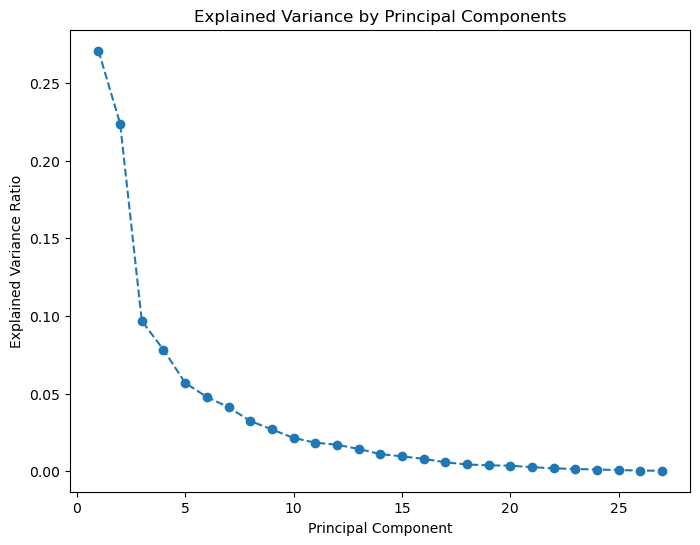

Number of components to keep (explaining at least 95% variance): 14

Transformed Data (Reduced Dimensions):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.161800  0.543913 -1.422773 -1.770239 -0.720175  0.561083 -0.680746   
1 -2.654197  2.491119  0.563535  3.772091 -0.924451  3.745104  0.491234   
2 -3.859816 -1.739002 -1.032210 -0.820048  0.792020  0.187891 -0.416613   
3  3.302015 -1.189152 -0.611741 -0.506217 -1.371209 -0.802755 -0.152112   
4 -2.511343 -3.443905  0.895177 -0.219490  1.747629  0.151007 -1.157501   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  
0  0.122054 -1.234985  0.393554 -0.503835 -0.316249  0.128289 -0.135902  
1  0.897694 -0.234185 -0.305879 -0.756999  0.414424  0.887552 -0.277463  
2 -0.263430 -0.256458  0.166967  0.836061  0.216671 -0.480573 -0.004245  
3 -0.810058 -0.202074 -0.067213  0.422655  0.582856  0.967432 -0.387031  
4  0.751017  0.712916 -0.748169 -1.069763 -1.179648  1.734824 -0.144985

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Standardizing the data (mean=0, std=1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_columns])

# Step 2: Apply PCA
pca = PCA()
pca.fit(df_scaled)

# Step 3: Explained Variance
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Step 4: Choose the number of components based on explained variance
cumulative_variance = explained_variance.cumsum()
components_to_keep = next(i for i, v in enumerate(cumulative_variance) if v >= 0.95) + 1

print(f"Number of components to keep (explaining at least 95% variance): {components_to_keep}")

# Step 5: Transform the data into the selected number of components
pca = PCA(n_components=components_to_keep)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(components_to_keep)])

# Show the transformed data
print("\nTransformed Data (Reduced Dimensions):")
print(df_pca.head())

In [11]:
q3 = df['Total.Rate'].quantile(0.75)

# Step 2: Create the binary target variable based on whether 'Total.Rate' is above or below Q3
df['Target'] = (df['Total.Rate'] > q3).astype(int)

# Display the updated DataFrame
df

,State,Total.Rate,Total.Number,Total.Population,Rates.Age.< 18,Rates.Age.18-45,Rates.Age.45-64,Rates.Age.> 64,Rates.Age and Sex.Female.< 18,Rates.Age and Sex.Male.< 18,...,Types.Lung.Age and Sex.Female.> 64,Types.Lung.Age and Sex.Male.> 64,Types.Lung.Race.White,Types.Lung.Race.White non-Hispanic,Types.Lung.Race.Black,Types.Lung.Race.Black non-Hispanic,Types.Lung.Race.Asian,Types.Lung.Race.Indigenous,Types.Lung.Race.Hispanic,Target
0,Alabama,214.2,71529.0,33387205.0,2.0,18.5,244.7,1017.8,2.0,2.1,...,221.7,457.4,59.9,60.4,52.6,52.8,23.0,22.9,14.8,1
1,Alaska,128.1,6361.0,4966180.0,1.7,11.8,170.9,965.2,0.0,0.0,...,268.3,335.0,48.7,49.5,45.6,47.9,33.0,74.4,0.0,0
2,Arizona,165.6,74286.0,44845598.0,2.5,13.6,173.6,840.2,2.6,2.5,...,191.9,275.8,39.5,42.2,38.2,40.4,21.3,11.1,21.6,0
3,Arkansas,223.9,45627.0,20382448.0,2.3,17.6,250.1,1048.3,2.6,2.0,...,248.7,484.7,63.4,64.2,62.9,63.0,18.1,16.2,14.6,1
4,California,150.9,393980.0,261135696.0,2.6,13.7,163.7,902.4,2.4,2.8,...,192.5,269.0,37.2,42.6,46.5,48.6,25.8,18.4,18.3,0
5,Colorado,139.0,49035.0,35267734.0,1.9,11.7,149.6,849.4,1.9,1.9,...,183.0,242.6,34.1,35.0,40.4,41.5,22.8,22.3,25.6,0
6,Connecticut,190.5,47567.0,24975889.0,1.6,13.6,163.6,971.2,1.6,1.7,...,222.2,301.1,42.2,43.2,38.4,40.4,20.8,0.0,20.3,0
7,Delaware,210.2,13233.0,6295263.0,2.2,16.0,217.5,993.3,0.0,0.0,...,253.7,369.1,55.0,55.7,49.3,49.8,23.7,0.0,15.5,0
8,District of Columbia,182.1,7730.0,4245359.0,0.0,12.4,251.8,1028.6,0.0,0.0,...,193.0,303.2,27.3,27.6,53.6,54.2,0.0,0.0,18.8,0
9,Florida,219.2,289905.0,132277071.0,2.1,15.9,206.9,901.2,2.0,2.2,...,215.8,329.0,48.0,52.5,38.1,39.5,19.8,21.0,24.0,1


Non-numeric columns: Index(['State'], dtype='object')
Model Performance:
               Precision    Recall  F1 Score  AUC Score
GaussianNB      0.000000  0.000000  0.000000   0.291667
MultinomialNB   0.333333  0.666667  0.444444   0.666667
BernoulliNB     0.000000  0.000000  0.000000   1.000000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


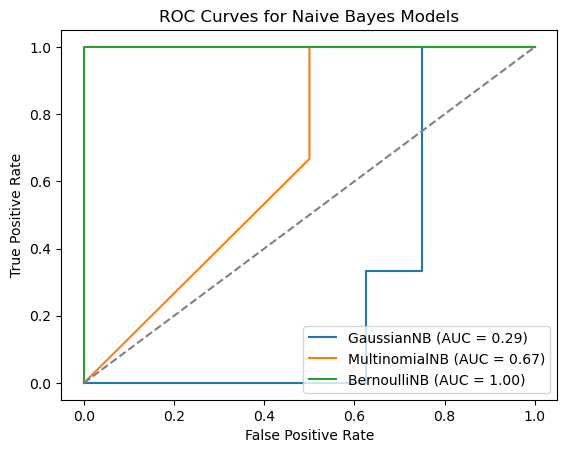

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")


le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])

X =df.drop(columns=['Target'])
y = df['Target']  # Target variable


# Step 2: Split the data into training and testing sets (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Step 3: Initialize the models
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}

# Step 4: Train and evaluate models
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Store the results
    results[model_name] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC Score': auc_roc
    }

    # ROC Curve plotting
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_roc:.2f})')

# Step 5: Display the results
print("Model Performance:")
results_df = pd.DataFrame(results).T
print(results_df)

# Plot ROC Curves for all models
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Naive Bayes Models')
plt.legend(loc='lower right')
plt.show()